51
51


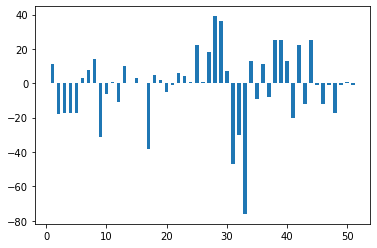

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the file with appropriate values.
vals = pd.read_csv("ETH-USD.csv", delimiter=',')

#print(vals)

# We only need the Date & Close value.
vals_close = vals['Close']
vals_date = vals['Date']

# TODO: Print graphs on a week to week basis
# Start of the week: Monday, End of the week: Sunday
# Reference values are: 29-07-2020 as Monday at row 0.
value_week = []
for i in range(0, len(vals_date)-1, 7):
    
    if ((i+6) < len(vals_date)-1):
        value_week.append(int(vals_close[i+6]) - int(vals_close[i]))

x = range(1,len(value_week)+1)
plt.bar(x, value_week, width=0.6)

print(len(x))
print(len(value_week))



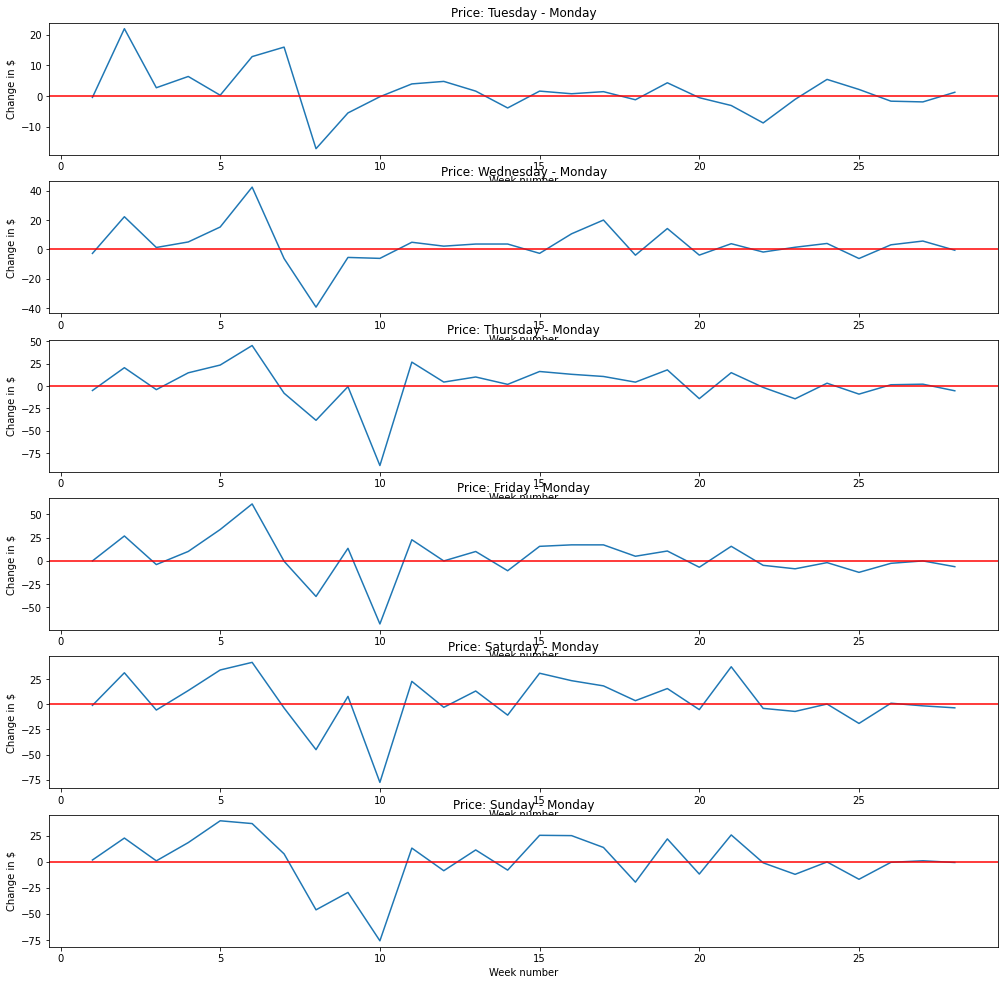

In [121]:
# Reference value is Monday, which is the 6th of January.
# Find the index corresponding to this value.

start = vals.index[vals['Date'] == "2020-01-06"].values

# Let's make a 2D array, where x[row][column] = [[r1:c1, r1:C2, ..],[...],[...]]
# The row index is week+1, column is weekday (0 = tuesday, ...)

# 1. Initiate an empty 2D array called x.
x = []

# 2. Create loop for week 1.
for i in range(int(start), len(vals_close), 7):
    cost = int(vals_close[i])
    y = []
    # Monday to Tuesday
    if (i+7 < len(vals_close)):
        for j in range(1,7):
            y.append(vals_close[i+j] - cost)
            #print(j)
    x.append(y)
    
# Delete the last value of the list (which is empty!)
x.pop(len(x)-1)

# Convert the multidim array into a numpy array. Easier to analyze.
x = np.array(x)

# Create individual axis y's.
price_tue = x[:,0]
price_wed = x[:,1]
price_thu = x[:,2]
price_fri = x[:,3]
price_sat = x[:,4]
price_sun = x[:,5]


# Create the axis x for our plot later on.
week_num = range(1, len(price_tue)+1)

plt.rcParams['figure.figsize'] = [17, 17]

plt.subplot(6, 1, 1)
plt.plot(week_num, price_tue)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Price: Tuesday - Monday')
plt.xlabel('Week number')
plt.ylabel('Change in $')

plt.subplot(6, 1, 2)
plt.plot(week_num,price_wed)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Price: Wednesday - Monday')
plt.xlabel('Week number')
plt.ylabel('Change in $')

plt.subplot(6, 1, 3)
plt.plot(week_num,price_thu)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Price: Thursday - Monday')
plt.xlabel('Week number')
plt.ylabel('Change in $')

plt.subplot(6, 1, 4)
plt.plot(week_num,price_fri)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Price: Friday - Monday')
plt.xlabel('Week number')
plt.ylabel('Change in $')

plt.subplot(6, 1, 5)
plt.plot(week_num,price_sat)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Price: Saturday - Monday')
plt.xlabel('Week number')
plt.ylabel('Change in $')

plt.subplot(6, 1, 6)
plt.plot(week_num,price_sun)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Price: Sunday - Monday')
plt.xlabel('Week number')
plt.ylabel('Change in $')

plt.show()


#print(len(price_sun)) # Perfect!

#print((len(vals_close) - int(start))/7) # Check accuracy. 28.71 weeks seems good!